# Study Time Visualization

## 1 - Import necessary libraries for visualization and analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from scipy.stats import norm


# These libraries are for machine learning modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


## 2 - Load data

In [5]:
file_path = r"StudyTime.csv" # put in your own path
df = pd.read_csv(file_path)

In [6]:
# take a look at the first 10 values to get an idea
df.head(10)

,Course Name,Mood Level,Studying Date,Start Time,End Time,Duration,Task Completion
0,SE,4,10/5/2024,9:02:12,9:32:58,0:30:46,1
1,SE,3,10/5/2024,10:15:24,11:50:17,1:34:53,0
2,DT,5,10/5/2024,12:40:02,13:25:47,0:45:45,1
3,Challenge1,2,10/5/2024,14:10:35,14:45:19,0:34:44,0
4,DBW,6,10/5/2024,15:30:10,17:33:28,2:03:18,1
5,PPI,4,10/8/2024,9:08:05,9:44:47,0:36:42,1
6,SE,3,10/8/2024,10:20:16,12:01:29,1:41:13,1
7,PBR,6,10/8/2024,13:05:30,14:09:21,1:03:51,1
8,PPI,3,10/8/2024,14:30:42,15:07:13,0:36:31,0
9,Challenge1,7,10/8/2024,15:45:10,17:05:35,1:20:25,1


In [7]:
# save interesting variables in easy-to-access variables
course = df["Course Name"]
mood = df["Mood Level"]
date = df["Studying Date"]
duration = df["Duration"]
start = df["Start Time"]
end = df["End Time"]
status = df["Task Completion"]

In [8]:
status.head(20)

0     1
1     0
2     1
3     0
4     1
5     1
6     1
7     1
8     0
9     1
10    1
11    0
12    0
13    1
14    1
15    0
16    1
17    1
18    1
19    0
Name: Task Completion, dtype: int64

In [9]:
# Convert hh:mm:ss to float
time_delta = pd.to_timedelta(duration)
# Extract total hours
duration = time_delta.dt.total_seconds() / 3600  # Convert seconds to hours

df["Duration"] = duration

# Print the result
print(df["Duration"])

0     0.512778
1     1.581389
2     0.762500
3     0.578889
4     2.055000
5     0.611667
6     1.686944
7     1.064167
8     0.608611
9     1.340278
10    0.623611
11    1.841389
12    1.084444
13    0.915000
14    0.710833
15    0.327222
16    1.968611
17    0.757222
18    0.929167
19    0.906944
20    0.913333
21    0.846944
22    1.456944
23    0.810556
24    0.895556
25    1.778056
26    0.546667
27    1.240278
28    0.628611
29    1.470833
30    1.120556
31    1.280278
32    0.421111
33    0.535556
34    1.179167
35    0.745556
36    1.556389
37    1.741389
38    0.768889
39    0.780278
40    0.661944
41    1.157778
42    1.492222
43    0.756111
Name: Duration, dtype: float64


## 3 - Scatter Plot, Trying to find relationship between var

Scatter plot for Mood, Duration, Task Completion

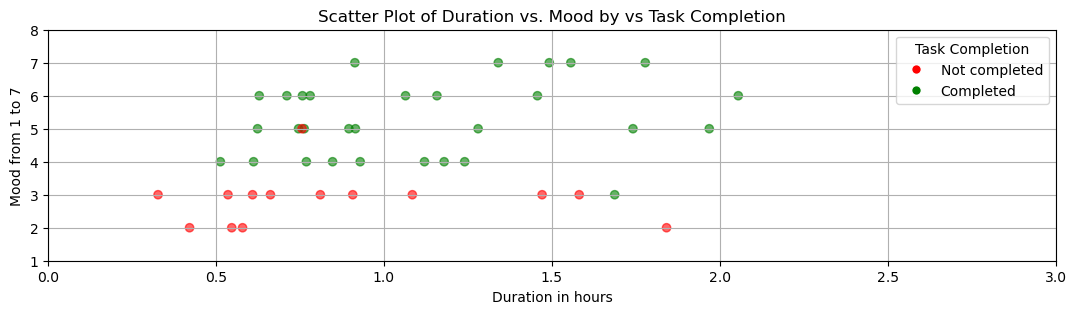

In [12]:
# Create a scatter plot
plt.figure(figsize=(13, 3))
plt.grid(True)


# Define colors based on the status
colors = status.map({0: 'red', 1: 'green'})

# let's take a look at the relationship between two variables through a scatter plot
plt.scatter(duration, mood, color=colors, alpha=0.6)
plt.xlabel("Duration in hours")
plt.ylabel("Mood from 1 to 7")
plt.xlim(0, 3)
plt.ylim(1, 8)


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Not completed', markerfacecolor='red', markersize=7),
    Line2D([0], [0], marker='o', color='w', label='Completed', markerfacecolor='green', markersize=7)
]
plt.legend(handles=legend_elements, title="Task Completion")

# Show plot
plt.title('Scatter Plot of Duration vs. Mood by vs Task Completion')
plt.show()


## 4 - Logistic Regression

##### Plot the data on scatter plot to intuitively see if there is any patterns in the data

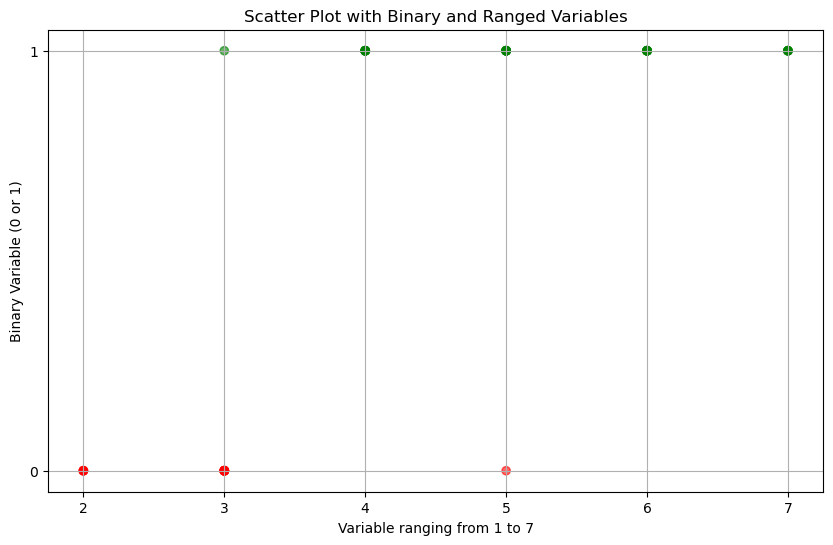

In [15]:
# Define colors based on the y values
colors = np.where(status == 1, 'green', 'red')  # Green for y=1, Red for y=0


plt.figure(figsize=(10, 6))
plt.scatter(mood, status, color=colors, alpha=0.6)

# Add title and labels
plt.title('Scatter Plot with Binary and Ranged Variables')
plt.xlabel('Variable ranging from 1 to 7')
plt.ylabel('Binary Variable (0 or 1)')

# Customize the y-axis to show only 0 and 1
plt.yticks([0, 1])

# Show the plot
plt.grid(True)
plt.show()

##### Split data to training set and testing set for logistic regresison model

In [17]:
mood = df[["Mood Level"]]
#status = df[["Task Completion"]]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(mood, status, test_size=0.2, random_state=17)


In [18]:
# Check the split sets
print(x_test)
x_train.head(10)

    Mood Level
40           3
18           4
11           2
23           3
19           3
36           7
38           4
35           5
43           5


,Mood Level
32,2
33,3
8,3
26,2
16,5
12,3
2,5
37,5
28,6
21,4


##### Build a logistic regression model

In [20]:
# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
# Predict on test set
y_pred = model.predict(x_test)

In [22]:
# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



In [23]:
# Get the coefficients
beta_0 = model.intercept_[0]  # Intercept
beta_1 = model.coef_[0][0]     # Coefficient for the independent variable

# Calculate x where P(y=1|x) = 0.5
if beta_1 != 0:
    x_half_prob = -beta_0 / beta_1
else:
    x_half_prob = None  # Handle case where slope is zero

# Display the result
print(f'The value of x where P(y=1|x) = 0.5 is: {x_half_prob}')

The value of x where P(y=1|x) = 0.5 is: 3.340921189030077


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


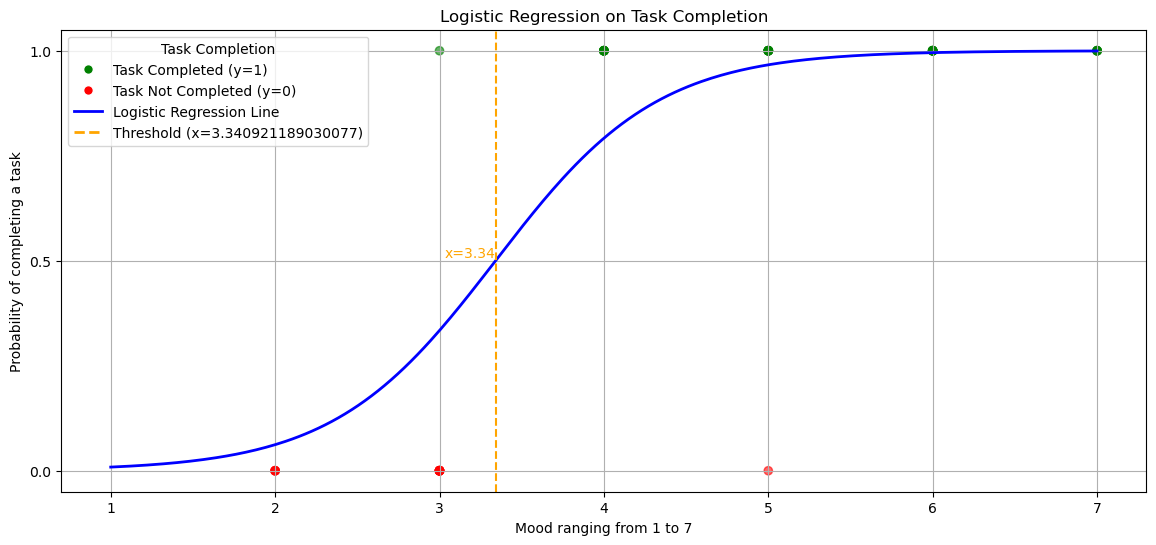

In [24]:
# Plot the data points
plt.figure(figsize=(14, 6))
plt.scatter(mood, status, color=colors, alpha=0.6)

# Plot the logistic curve
x_values = np.linspace(1, 7, 300).reshape(-1, 1)
y_prob = model.predict_proba(x_values)[:, 1]  # Probability that y=1
plt.plot(x_values, y_prob, color='blue', linewidth=2, label='Logistic Regression Curve')

# Plot the vertical line to show the threshold of the logistic regression
plt.axvline(x=x_half_prob, color='orange', linestyle='--', label=f'Threshold (P=0.5 at x={x_half_prob:.2f})')
plt.text(x_half_prob, 0.5, f'x={x_half_prob:.2f}', color='orange', horizontalalignment='right', verticalalignment='bottom', fontsize=10)



# Labels and legend
plt.title('Logistic Regression on Task Completion')
plt.xlabel('Mood ranging from 1 to 7')
plt.ylabel('Probability of completing a task')
plt.yticks([0, 0.5, 1])

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Task Completed (y=1)', 
           markerfacecolor='green', markersize=7),
    Line2D([0], [0], marker='o', color='w', label='Task Not Completed (y=0)', 
           markerfacecolor='red', markersize=7),
    Line2D([0], [0], color='blue', lw=2, label='Logistic Regression Line'),
    Line2D([0], [0], color='orange', lw=2, linestyle='--', label='Threshold (x=3.340921189030077)')
]

plt.legend(handles=legend_elements, title="Task Completion")


plt.grid(True)
plt.show()

## 5 - Plot histogram

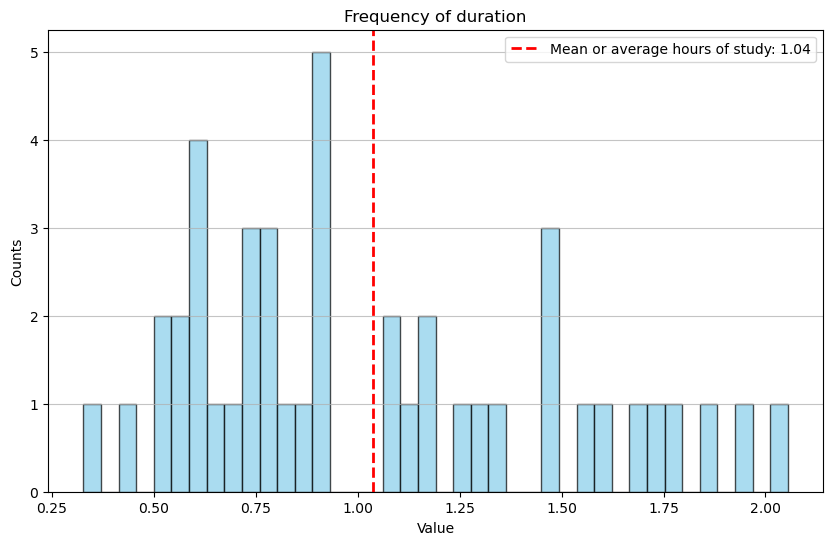

In [26]:

# Calculate the mean and standard deviation of the data
mean_value = np.mean(duration)
std_dev = np.std(duration)

# Create a range of x values for the bell curve
x = np.linspace(mean_value - 4*std_dev, mean_value + 4*std_dev, 100)

# Calculate the normal distribution (PDF) for the x values
y = norm.pdf(x, mean_value, std_dev)



# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(duration, bins=40, color='skyblue', edgecolor='black', alpha=0.7)
# Add a vertical line for the mean
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean or average hours of study: {mean_value:.2f}')

# Plot the bell curve
#plt.plot(x, y, color='red', linewidth=2, label='Normal Distribution Curve')

# Add title and labels
plt.title('Frequency of duration')
plt.xlabel('Value')
plt.ylabel('Counts')

# Show grid for better readability
plt.grid(axis='y', alpha=0.75)

# Add legend
plt.legend()

# Show the plot
plt.show()


## 6 - Box Plot

In [28]:
# Generate sample data for multiple groups
data1 = df[df['Course Name'] == 'DT']["Duration"]
data2 = df[df['Course Name'] == 'SE']["Duration"]
data3 = df[df['Course Name'] == 'Challenge1']["Duration"]
data4 = df[df['Course Name'] == 'DBW']["Duration"]
data5 = df[df['Course Name'] == 'PPI']["Duration"]
data6 = df[df['Course Name'] == 'PBR']["Duration"]

print(data6.sum())

5.992222222222223


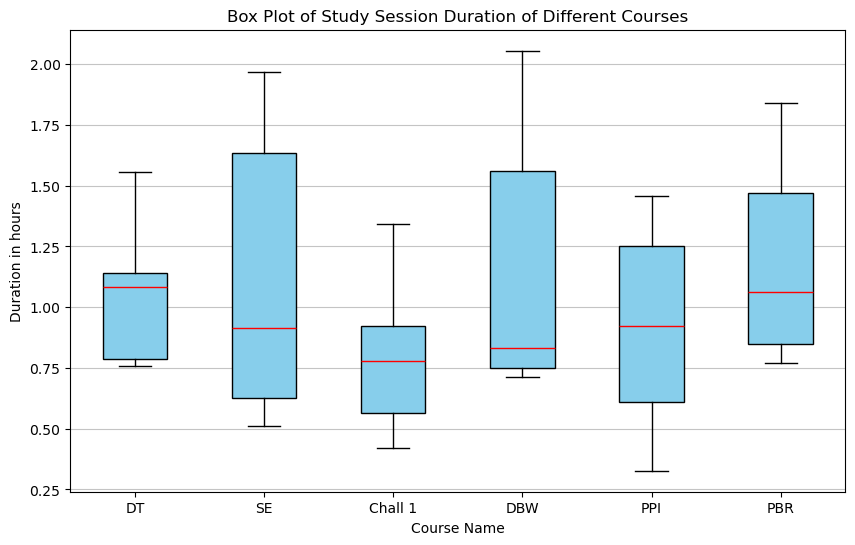

In [29]:
# Combine data into a list
data = [data1, data2, data3, data4, data5, data6]
labels = ['DT', 'SE', 'Chall 1', 'DBW', 'PPI', 'PBR']


# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=True, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'), whiskerprops=dict(color='black'))

# Add title and labels
plt.title('Box Plot of Study Session Duration of Different Courses')
plt.xlabel('Course Name')
plt.ylabel('Duration in hours')
plt.xticks([1, 2, 3, 4, 5, 6], labels)  # Custom x-axis labels

# Show the plot
plt.grid(axis='y', alpha=0.75)
plt.show()


## 7 - Total Study Time of each course

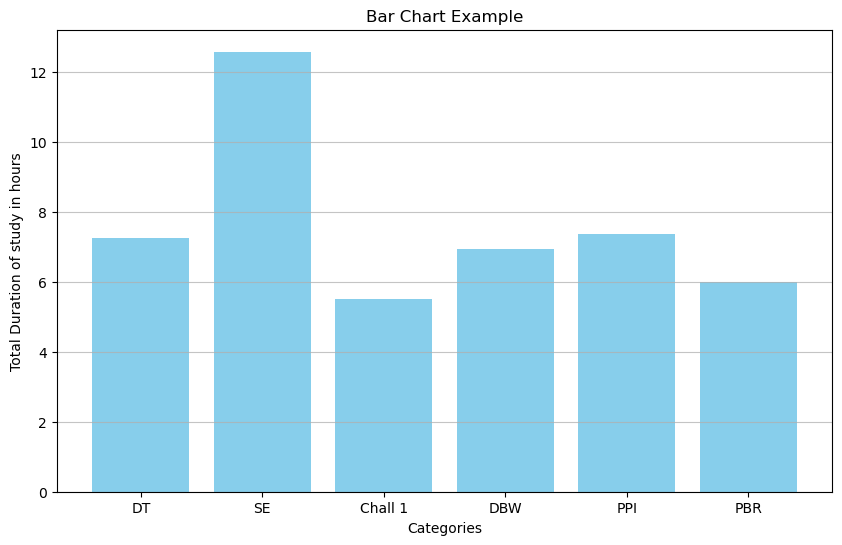

In [31]:
values = [data1.sum(), data2.sum(), data3.sum(), data4.sum(), data5.sum(), data6.sum()]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')

# Add title and labels
plt.title('Bar Chart Example')
plt.xlabel('Categories')
plt.ylabel('Total Duration of study in hours')

# Show the plot
plt.grid(axis='y', alpha=0.75)
plt.show()


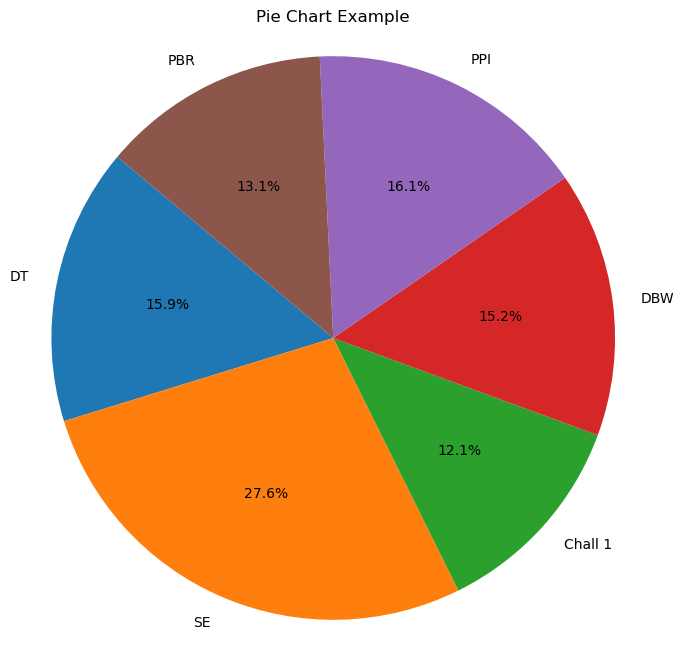

In [32]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # The six colors

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Pie Chart Example')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
